Note: use time module (sleep) to not request website too frequently

Can use .strip() to get rid of whitespace

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import bs4
import requests

In [168]:
team='Philadelphia-Phillies'
year=2020
link = "https://www.spotrac.com/mlb/"+team+"/payroll/"+str(year)+"/"
link

'https://www.spotrac.com/mlb/Philadelphia-Phillies/payroll/2020/'

In [31]:
with open("webpages/Los Angeles Angels 2022 Salaries & Payroll Table Spotrac.htm", "r") as HTMLFile:
    webhtml=HTMLFile.read()

In [32]:
soup = bs4.BeautifulSoup(webhtml, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en"> <![endif]-->
<!--[if IE 9]>    <html class="no-js ie9 oldie" lang="en"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-US">
 <!--<![endif]-->
 <head>
  <!-- start:global -->
  <meta charset="utf-8"/>
  <!-- end:global -->
  <!-- start:page title -->
  <title>
   Los Angeles Angels 2022 Salaries &amp; Payroll Table | Spotrac
  </title>
  <!-- end:page title -->
  <meta content="MLB,2022, Los Angeles Angels, Los Angeles, Angels, salary cap, table, cap hit, bonuses, retained salary, injured reserve, cap space" name="keywords"/>
  <meta content="Los Angeles Angels 2022 salary cap table, including breakdowns of salaries, bonuses, incentives, cap figures, dead money and more." name="description"/>
  <meta content="Los Angeles Angels 2022 Salaries Payroll" pro

In [47]:
player_names_page = soup.find_all('td',{'class':'player'})
player_names= [n.a.text if hasattr(n.a,'text') else None for n in player_names_page ]

In [57]:
np.where(np.array(player_names)==None)[0]

array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58])

In [94]:
len(player_names)-np.sum((np.array(player_names)==None))

97

In [88]:
cols = soup.find_all('td',{'class':'center small'})
cols[:3] # Age, Position, Status

[<td class="center small"><span class="cap" title="">30</span></td>,
 <td class="center small"><span class="cap" title="">CF</span></td>,
 <td class="center small"><span class="cap" title="">Vet</span></td>]

In [89]:
dat = []
rowcount = 0
while rowcount < len(cols):
    dat.append([row.span.text for row in cols[rowcount:rowcount+3]])
    rowcount+=3

In [95]:
dat[:28]

[['30', 'CF', 'Vet'],
 ['32', '3B', 'Vet'],
 ['34', 'RP', 'Vet'],
 ['34', 'RP', 'Vet'],
 ['30', 'SP', 'Vet'],
 ['27', 'SP/DH', 'Vet'],
 ['28', 'SS', 'Vet'],
 ['31', 'C', 'Vet'],
 ['38', 'C', 'Vet'],
 ['31', '3B', 'Vet'],
 ['25', 'RP', 'Pre-Arb'],
 ['28', 'RP', 'Pre-Arb'],
 ['26', 'RP', 'Pre-Arb'],
 ['25', 'SP', 'Pre-Arb'],
 ['28', 'RF', 'Pre-Arb'],
 ['22', 'SP', 'Pre-Arb'],
 ['25', '2B', 'Pre-Arb'],
 ['26', 'RP', 'Pre-Arb'],
 ['24', 'SP', 'Pre-Arb'],
 ['23', 'RF', 'Pre-Arb'],
 ['26', 'SP', 'Pre-Arb'],
 ['26', '2B', 'Pre-Arb'],
 ['27', '1B', 'Pre-Arb'],
 ['30', 'RP', 'Pre-Arb'],
 ['22', 'SS', 'Pre-Arb'],
 ['30', 'RP', 'Pre-Arb'],
 ['22', 'C', 'Pre-Arb'],
 ['25', 'SP', 'Pre-Arb']]

In [113]:
money = soup.find_all('td',{'class':'right'})#, 'title':'Total Adjusted Salary including base salary and bonuses'})
money = soup.find_all('span',{'title':'Total Adjusted Salary including base salary and bonuses'})
money[:5] # Base salary, signing bonus, incentives, payroll salary, total adjusted salary and bonuses

[<span class="cap" title="Total Adjusted Salary including base salary and bonuses">$37,216,667</span>,
 <span class="cap" title="Total Adjusted Salary including base salary and bonuses">$36,571,428</span>,
 <span class="cap" title="Total Adjusted Salary including base salary and bonuses">$7,500,000</span>,
 <span class="cap" title="Total Adjusted Salary including base salary and bonuses">$7,000,000</span>,
 <span class="cap" title="Total Adjusted Salary including base salary and bonuses">$6,750,000</span>]

In [128]:
# also convert it into float form
salary = [float(mon.text[1:].replace(",", "")) for mon in money]

In [127]:
salary[:28]

[37216667.0,
 36571428.0,
 7500000.0,
 7000000.0,
 6750000.0,
 5500000.0,
 4000000.0,
 3000000.0,
 1750000.0,
 1500000.0,
 730000.0,
 720000.0,
 720000.0,
 720000.0,
 720000.0,
 647566.0,
 576900.0,
 546132.0,
 538016.0,
 478676.0,
 249664.0,
 180762.0,
 176916.0,
 130764.0,
 73074.0,
 57690.0,
 26922.0,
 23076.0]

---
Alright let's make a dataframe to start

In [135]:
nrows = 28
# let's split it into first and last names
names = np.array([name.split(' ') for name in player_names[:nrows]])
pays = np.array(salary[:nrows])
age_pos_status = np.array(dat[:nrows])

In [147]:
age_pos_status[:,2]

array(['Vet', 'Vet', 'Vet', 'Vet', 'Vet', 'Vet', 'Vet', 'Vet', 'Vet',
       'Vet', 'Pre-Arb', 'Pre-Arb', 'Pre-Arb', 'Pre-Arb', 'Pre-Arb',
       'Pre-Arb', 'Pre-Arb', 'Pre-Arb', 'Pre-Arb', 'Pre-Arb', 'Pre-Arb',
       'Pre-Arb', 'Pre-Arb', 'Pre-Arb', 'Pre-Arb', 'Pre-Arb', 'Pre-Arb',
       'Pre-Arb'], dtype='<U7')

In [149]:
df = pd.DataFrame({'year':nrows*[2022],'team':nrows*['Los Angeles Angels'], 'first_name':names[:,0], 'last_name':names[:,1],'pay':pays,
              'age':age_pos_status[:,0].astype(int), 'position':age_pos_status[:,1], 'status':age_pos_status[:,2]})

In [151]:
df.head()

,year,team,first_name,last_name,pay,age,position,status
0,2022,Los Angeles Angels,Mike,Trout,37216667.0,30,CF,Vet
1,2022,Los Angeles Angels,Anthony,Rendon,36571428.0,32,3B,Vet
2,2022,Los Angeles Angels,Aaron,Loup,7500000.0,34,RP,Vet
3,2022,Los Angeles Angels,Ryan,Tepera,7000000.0,34,RP,Vet
4,2022,Los Angeles Angels,Michael,Lorenzen,6750000.0,30,SP,Vet


(array([2., 1., 1., 1., 3., 0., 9., 1., 2., 1., 1., 4., 0., 0., 2.]),
 array([4.36316053, 4.57699899, 4.79083746, 5.00467592, 5.21851438,
        5.43235285, 5.64619131, 5.86002977, 6.07386823, 6.2877067 ,
        6.50154516, 6.71538362, 6.92922209, 7.14306055, 7.35689901,
        7.57073748]),
 <BarContainer object of 15 artists>)

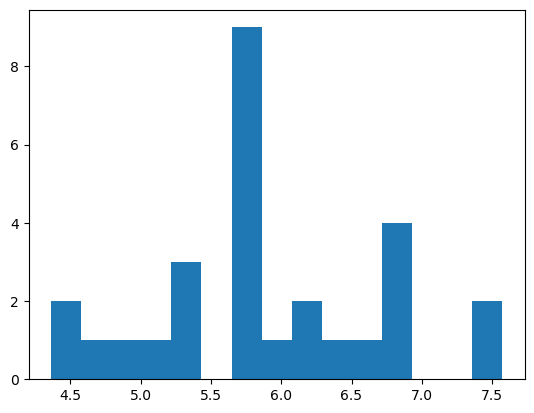

In [158]:
plt.hist(np.log10(df['pay']), bins=15)